# Data set
### Variable - Description
<br>enrollee_id - Unique ID for enrollee
<br>city - City code
<br>city_development_index - Developement index of the city (scaled)
<br>gender - Gender
<br>relevent_experience - Relevent experience
<br>enrolled_university - Type of University course enrolled if any
<br>education_level - Education level
<br>major_discipline - Major discipline
<br>experience - Total experience in years
<br>company_size -No of employees in current employer's company
<br>company_type - Type of current employer
<br>last_new_job -Difference in years between previous job and current job
<br>training_hours - training hours completed
### target
<br>0 - Not looking for job change
<br>1 - Looking for Job

In [194]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [195]:
train = pd.read_csv("resources/train.csv")
test = pd.read_csv("resources/test.csv")

In [196]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [197]:
train.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0


In [198]:
train.columns[train.isna().any()]

Index(['gender', 'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job'],
      dtype='object')

In [199]:
train.isna().sum()[train.isna().sum() > 0]

gender                 4098
enrolled_university     342
education_level         457
major_discipline       2838
experience               59
company_size           4779
company_type           5039
last_new_job            367
dtype: int64

In [200]:
target_columns = ['target']
ignore_columns = ['enrollee_id']

In [201]:
# Listing unique values in all columns
for col in train.columns:
    print(col)
    print(f"{col}: {train[col].unique()} unique values")

enrollee_id
enrollee_id: [23798 29166    46 ... 11514  1689  5995] unique values
city
city: ['city_149' 'city_83' 'city_16' 'city_64' 'city_100' 'city_21' 'city_114'
 'city_103' 'city_97' 'city_160' 'city_65' 'city_90' 'city_75' 'city_136'
 'city_159' 'city_67' 'city_28' 'city_10' 'city_73' 'city_76' 'city_104'
 'city_27' 'city_30' 'city_61' 'city_99' 'city_41' 'city_142' 'city_9'
 'city_116' 'city_128' 'city_74' 'city_69' 'city_1' 'city_176' 'city_40'
 'city_123' 'city_152' 'city_165' 'city_89' 'city_36' 'city_44' 'city_46'
 'city_45' 'city_134' 'city_93' 'city_180' 'city_162' 'city_84' 'city_138'
 'city_173' 'city_19' 'city_71' 'city_158' 'city_23' 'city_102' 'city_105'
 'city_91' 'city_11' 'city_13' 'city_57' 'city_20' 'city_14' 'city_37'
 'city_115' 'city_50' 'city_167' 'city_12' 'city_143' 'city_126' 'city_77'
 'city_101' 'city_150' 'city_179' 'city_107' 'city_175' 'city_146'
 'city_98' 'city_166' 'city_118' 'city_129' 'city_127' 'city_24' 'city_81'
 'city_26' 'city_139' 'city_94'

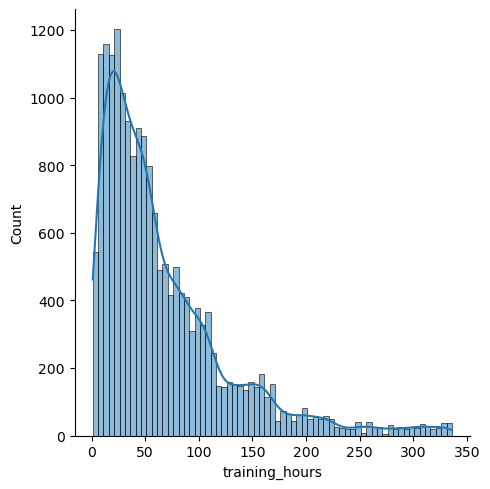

In [202]:
sns.displot(train['training_hours'], kde=True)

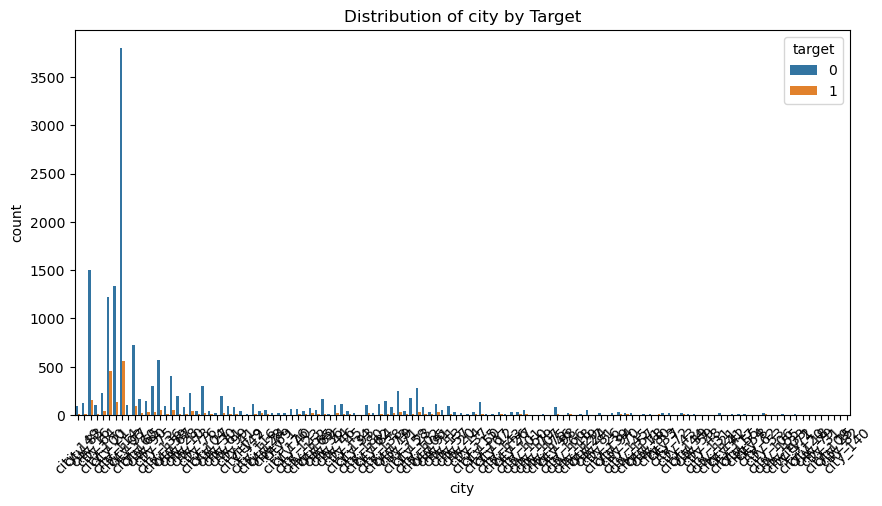

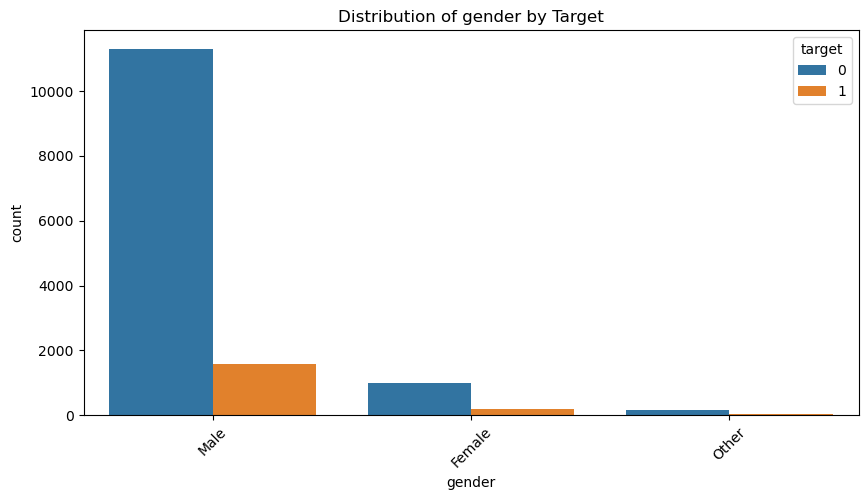

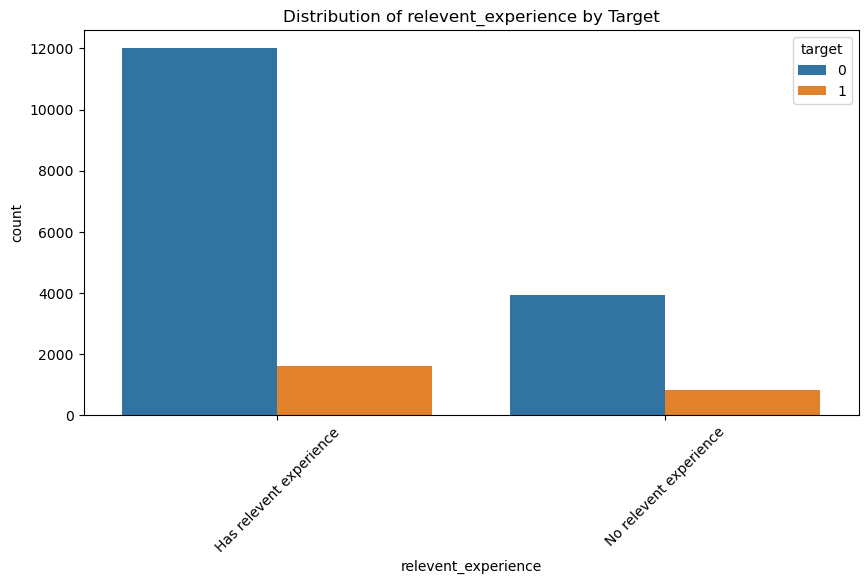

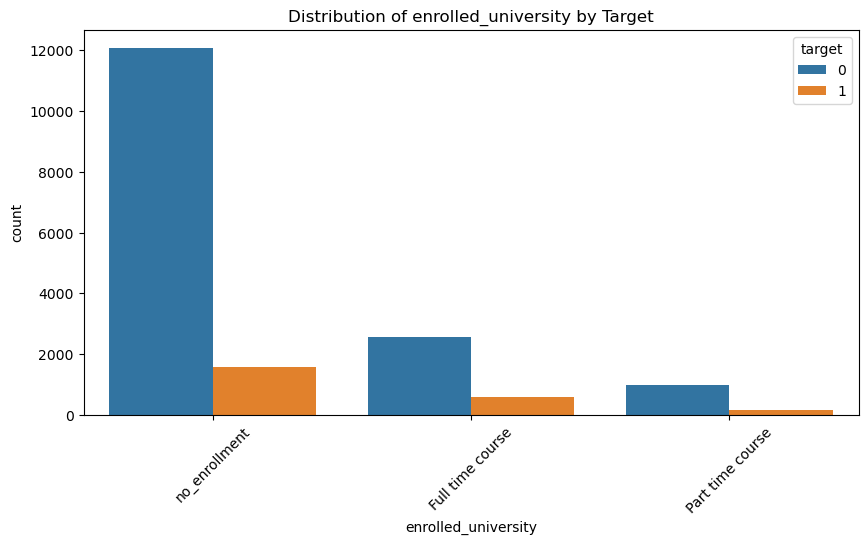

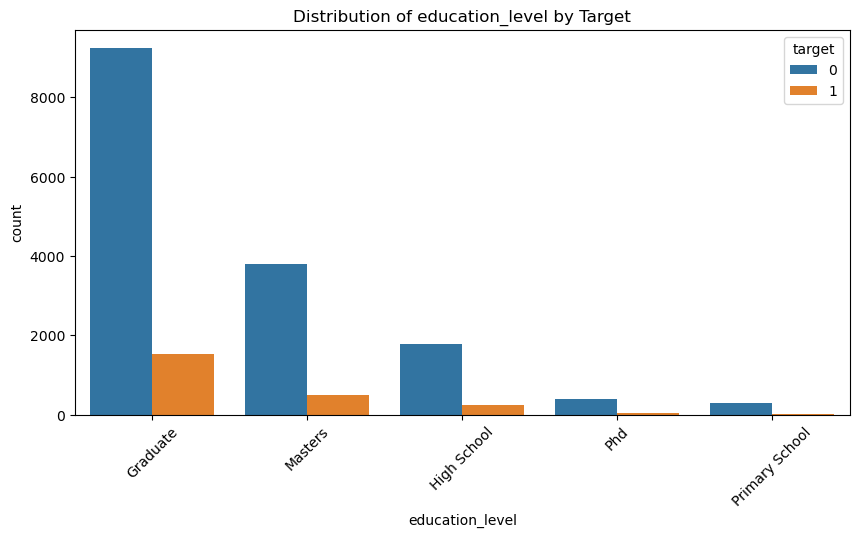

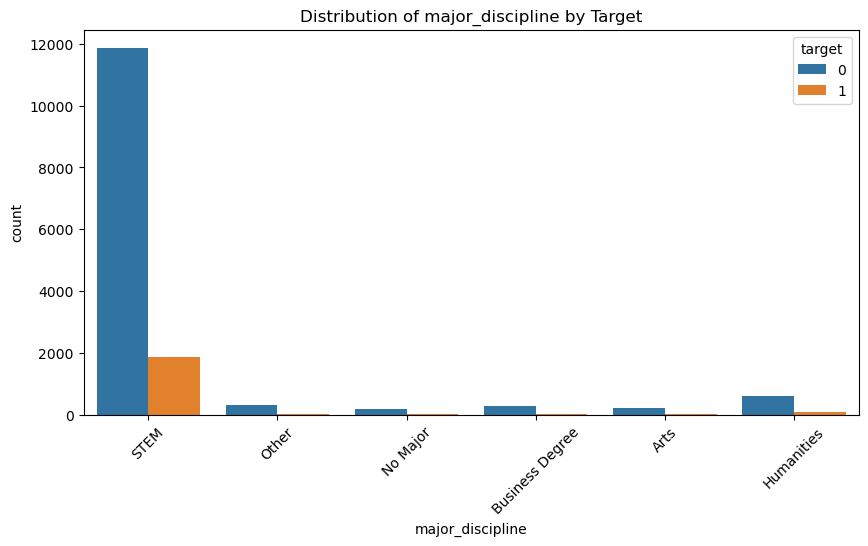

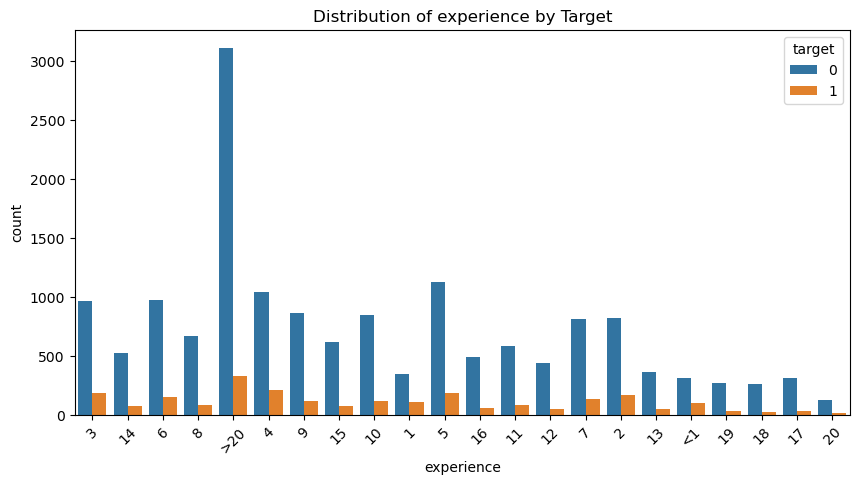

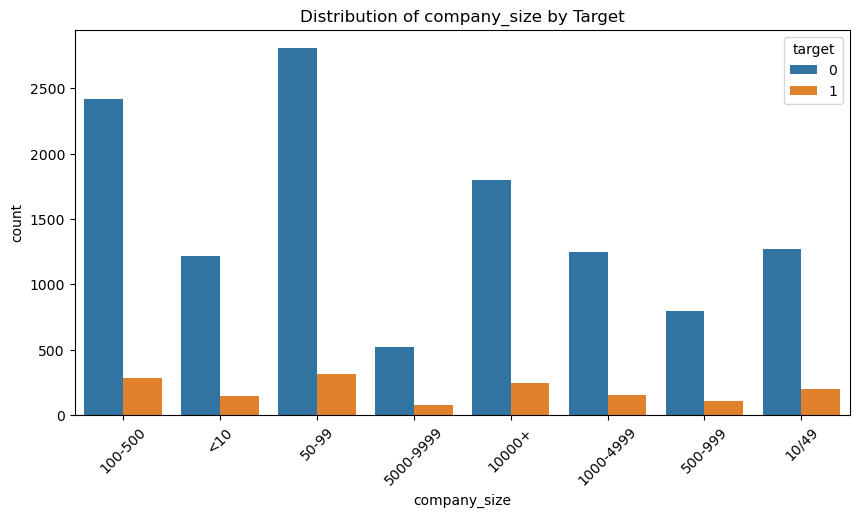

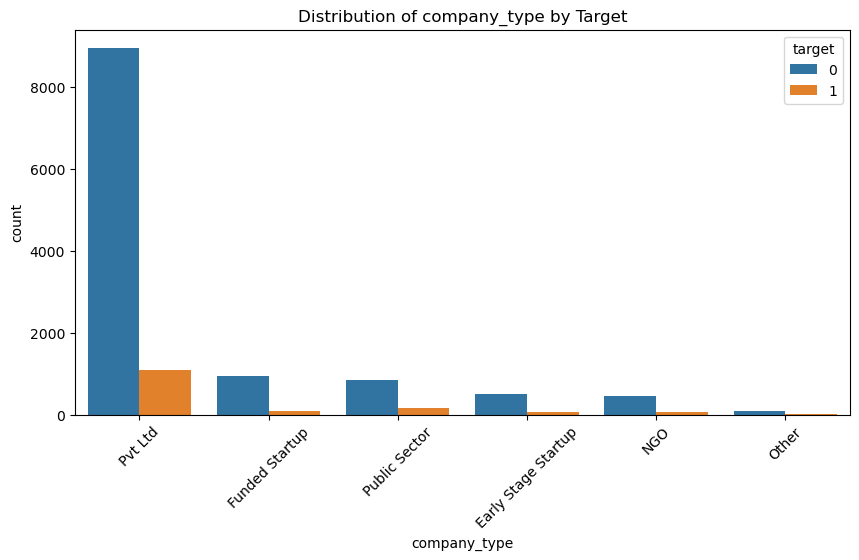

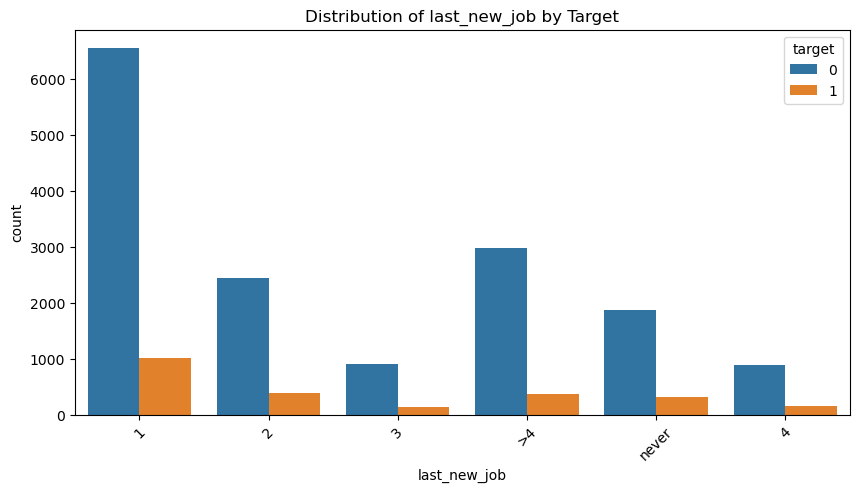

In [203]:
for col in train.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train, x=col, hue='target')
    plt.title(f'Distribution of {col} by Target')
    plt.xticks(rotation=45)
    plt.show()

<Axes: ylabel='city'>

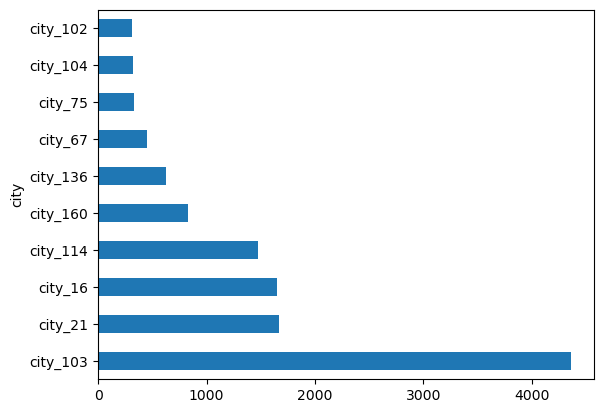

In [204]:
train['city'].value_counts().nlargest(10).plot(kind='barh')

In [205]:
cat_cols = train.select_dtypes(include=['object']).columns
cat_cols

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

In [206]:
num_cols = train.drop(columns=ignore_columns + target_columns).select_dtypes(exclude=['object']).columns
num_cols

Index(['city_development_index', 'training_hours'], dtype='object')

In [207]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix


In [208]:
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
cat_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [209]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [210]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [211]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['city_development_index', 'training_hours'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [212]:
X = train.drop(columns=ignore_columns + target_columns)
y = train[target_columns]

In [213]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=24)

In [214]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((14687, 12), (3672, 12), (14687, 1), (3672, 1))

In [215]:
model_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['city_development_index', 'training_hours'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [216]:
model_pipeline.predict(test_X)

array([0, 0, 0, ..., 0, 0, 0])

In [217]:
model_pipeline.predict_proba(test_X)

array([[0.93711089, 0.06288911],
       [0.94593434, 0.05406566],
       [0.76911731, 0.23088269],
       ...,
       [0.86566448, 0.13433552],
       [0.82065484, 0.17934516],
       [0.95427293, 0.04572707]])

In [218]:
def evaluate_model(model, train_X, train_y, test_X, test_y):
    
    train_preds = model.predict(train_X)
    test_preds = model.predict(test_X)

    print("Training Accuracy:", roc_auc_score(train_y, train_preds))
    print("Testing Accuracy:", roc_auc_score(test_y, test_preds))
    print("\nClassification Report:\n", classification_report(test_y, test_preds))
    print("Confusion Matrix:\n", confusion_matrix(test_y, test_preds))

In [219]:
evaluate_model(model_pipeline, train_X, train_y, test_X, test_y)

Training Accuracy: 0.5027998025470967
Testing Accuracy: 0.5004977784787199

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92      3158
           1       0.25      0.00      0.00       514

    accuracy                           0.86      3672
   macro avg       0.56      0.50      0.46      3672
weighted avg       0.77      0.86      0.80      3672

Confusion Matrix:
 [[3155    3]
 [ 513    1]]


In [220]:
submission = pd.read_csv("resources/sample_submission.csv")
submission.head()

,enrollee_id,target
0,16548,0
1,12036,0
2,11061,0
3,5032,0
4,17599,0


In [221]:
submission['target'] = model_pipeline.predict_proba(test.drop(columns=ignore_columns))[:,1]
submission.to_csv("resources/submission_1.csv", index=False)

In [222]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [223]:
param_grid = [
    {
        'model' : [LogisticRegression()],
        'model__penalty' : ['l2','None','l1','elasticnet'],
        'model__C' : [0.5,3]
    },
    {
        'model' : [DecisionTreeClassifier()],
        'model__max_depth' : [3,5]
    }
]

In [224]:
gridSearch = GridSearchCV(estimator=model_pipeline,
                          param_grid=param_grid,
                          scoring='roc_auc',
                          cv=2)

In [225]:
from imblearn.over_sampling import RandomOverSampler

In [226]:
overSampler = RandomOverSampler()

In [227]:
train_X_OS, train_y_OS = overSampler.fit_resample(train_X, train_y)

In [228]:
gridSearch.fit(train_X_OS, train_y_OS)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['city_development_index', 'training_hours'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEn...
                                                                         Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object'))])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__penalty': ['l2', 'None', 'l1', 'elasticnet']},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [3, 5]}],
             scoring='roc_auc')

In [229]:
gridSearch.best_params_

{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}

In [230]:
gridSearch.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['city_development_index', 'training_hours'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object'))])),
                ('model', LogisticRegression(C=3))])

In [231]:
res_df = pd.DataFrame(gridSearch.cv_results_)

In [232]:
pd.set_option('display.max_colwidth', 1000)
res_df[['param_model','params', 'mean_test_score', 'rank_test_score']]

,param_model,params,mean_test_score,rank_test_score
0,LogisticRegression(),"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}",0.668191,2
1,LogisticRegression(),"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'None'}",NaN,5
2,LogisticRegression(),"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l1'}",NaN,5
3,LogisticRegression(),"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'elasticnet'}",NaN,5
4,LogisticRegression(),"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}",0.668677,1
5,LogisticRegression(),"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'None'}",NaN,5
6,LogisticRegression(),"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l1'}",NaN,5
7,LogisticRegression(),"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'elasticnet'}",NaN,5
8,DecisionTreeClassifier(),"{'model': DecisionTreeClassifier(), 'model__max_depth': 3}",0.623599,4
9,DecisionTreeClassifier(),"{'model': DecisionTreeClassifier(), 'model__max_depth': 5}",0.647430,3


In [233]:
new_model = gridSearch.best_estimator_

In [234]:
evaluate_model(new_model, train_X, train_y, test_X, test_y)

Training Accuracy: 0.6299061771040482
Testing Accuracy: 0.6175983174101719

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.67      0.77      3158
           1       0.22      0.56      0.31       514

    accuracy                           0.66      3672
   macro avg       0.56      0.62      0.54      3672
weighted avg       0.81      0.66      0.71      3672

Confusion Matrix:
 [[2119 1039]
 [ 224  290]]


In [235]:
submission['target'] = model_pipeline.predict_proba(test.drop(columns=ignore_columns))[:,1]
submission.to_csv("resources/submission_2.csv", index=False)

In [236]:
import joblib

In [237]:
joblib.dump(new_model, 'deployment/janatahack_model.pkl')

['deployment/janatahack_model.pkl']

In [238]:
%%writefile deployment/app.py
import streamlit as st
import pandas as pd
import joblib
st.title("JanataHack Prediction App")
dataFrame = pd.read_csv("resources/train.csv")
city = st.selectbox('City',dataFrame['city'].unique())
gender = st.selectbox('Gender',dataFrame['gender'].unique())
relevent_experience = st.selectbox('Relevent Experience',dataFrame['relevent_experience'].unique())
enrolled_university = st.selectbox('Enrolled University',dataFrame['enrolled_university'].unique())
education_level = st.selectbox('Education Level',dataFrame['education_level'].unique())
major_discipline = st.selectbox('Major Discipline',dataFrame['major_discipline'].unique())
experience = st.selectbox('Experience',dataFrame['experience'].unique())
company_size = st.selectbox('Company Size',dataFrame['company_size'].unique())
company_type = st.selectbox('Company Type',dataFrame['company_type'].unique())
last_new_job = st.selectbox('Last New Job',dataFrame['last_new_job'].unique())
training_hours = st.selectbox('Training Hours',dataFrame['training_hours'].unique())

city_development_index = st.number_input('City Development Index')
training_hours = st.number_input('Training Hours')
inputs = {
    'city': city,
    'city_development_index': city_development_index,
    'gender': gender,
    'relevent_experience': relevent_experience,
    'enrolled_university': enrolled_university,
    'education_level': education_level,
    'major_discipline': major_discipline,
    'experience': experience,
    'company_size': company_size,
    'company_type': company_type,
    'last_new_job': last_new_job,
    'training_hours': training_hours
}

if st.button('Predict'):
    input_df = pd.DataFrame([inputs])
    model = joblib.load('janatahack_model.pkl')
    prediction = model.predict(input_df)
    st.write(f'Prediction: {prediction[0]}')

Writing deployment/app.py
